<a href="https://colab.research.google.com/github/AppleBoiy/ocr-handwritten-digit/blob/main/notebooks/cnn/200epoch_early_stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition with CNN (No Early Stopping)
Optimized CNN for Handwritten Digit Recognition (with Optimizations for 100-200 Epochs)



## Step 1: Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


## Step 2: Load and Preprocess the Data


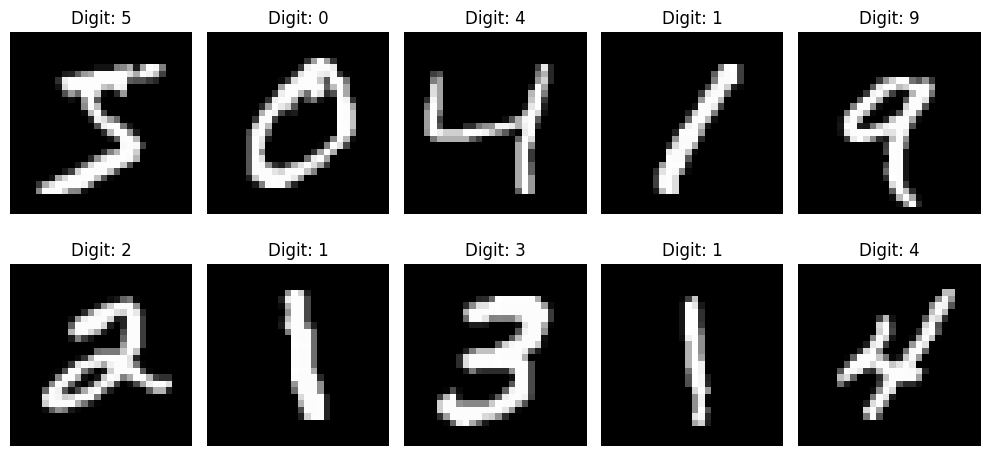

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Visualize some of the training images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Digit: {y_train[i].argmax()}')
    plt.axis('off')
plt.tight_layout()
plt.show()


## Step 3: Data Augmentation


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15
)

datagen.fit(x_train)

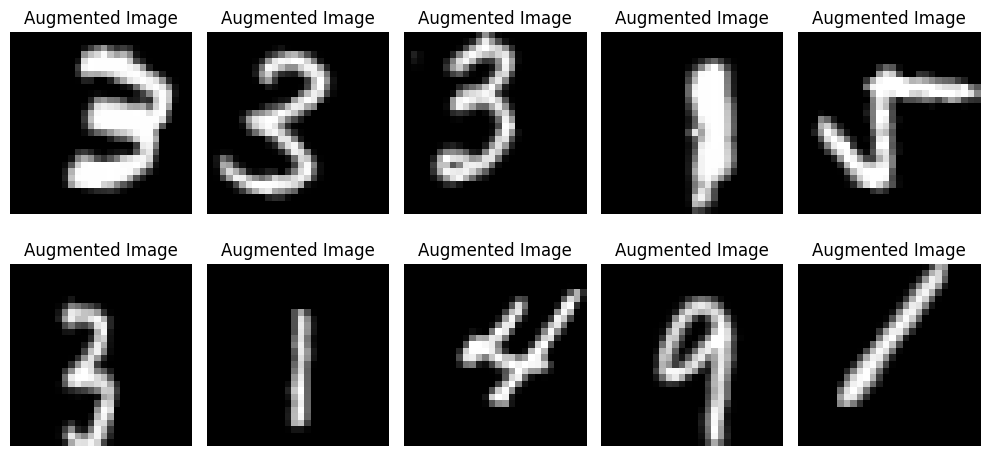

In [5]:
# Generate a batch of augmented images
augmented_images, _ = next(datagen.flow(x_train, y_train, batch_size=10))  # Generate a batch of 10 images

# Plot the augmented images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.title('Augmented Image')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 4: Build the CNN Model


In [6]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),  # Add Batch Normalization to improve training speed
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Increased neurons in Dense layer
    layers.Dropout(0.5),  # Added Dropout for regularization
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 5: Compile the Model



In [7]:
initial_lr = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_lr, decay_steps=10000, decay_rate=0.9, staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 258,954 (1011.54 KB)

 Trainable params: 258,314 (1009.04 KB)

 Non-trainable params: 640 (2.50 KB)

## Step 6: Define Callbacks


1.   The ModelCheckpoint will save the best model based on validation loss during training.

2.   After the training is done, we'll manually save the last model.


In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('mnist_cnn_best_epoch200.keras',
                                                       monitor='val_loss', save_best_only=True)

## Step 7: Train the Model

In [10]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=256),  # Use datagen.flow for augmented batches
                    epochs=200, validation_data=(x_val, y_val),
                    callbacks=[early_stop, model_checkpoint], verbose=1)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 111ms/step - accuracy: 0.7261 - loss: 0.8588 - val_accuracy: 0.0995 - val_loss: 3.6290
Epoch 2/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.9401 - loss: 0.1923 - val_accuracy: 0.2559 - val_loss: 2.8178
Epoch 3/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9560 - loss: 0.1451 - val_accuracy: 0.9508 - val_loss: 0.1511
Epoch 4/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 150ms/step - accuracy: 0.9630 - loss: 0.1216 - val_accuracy: 0.9812 - val_loss: 0.0583
Epoch 5/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9648 - loss: 0.1130 - val_accuracy: 0.9813 - val_loss: 0.0550
Epoch 6/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9684 - loss: 0.1044 - val_accuracy: 0.9778 - val_loss: 0.0695
Epoch 7/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.9705 - loss: 0.0904 - val_accuracy: 0.9833 - val_loss: 0.0533
Epoch 8/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9729 - loss: 0.0888 - va

In [11]:
model.save('mnist_cnn_final_epoch200.keras')

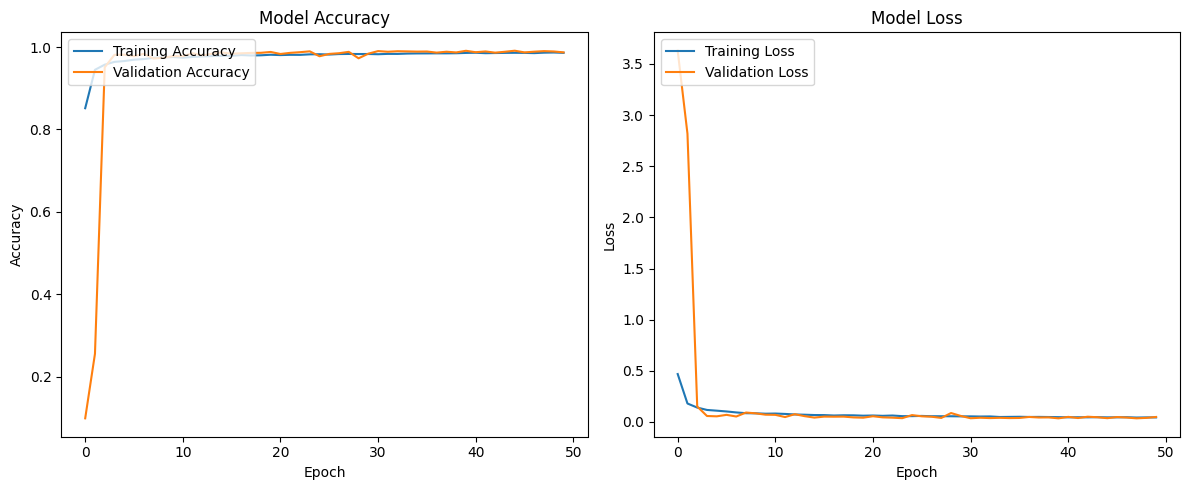

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Step 8: Evaluate the Model


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0398
Test accuracy: 0.9896000027656555


## Step 9: Visualize Predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


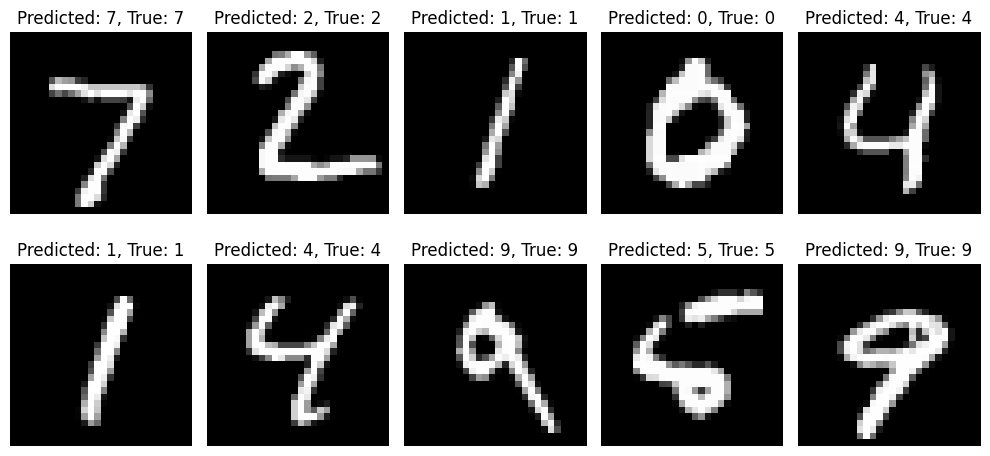

In [14]:
predictions = model.predict(x_test)

# Visualize some predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}, True: {y_test[i].argmax()}')
    plt.axis('off')
plt.tight_layout()
plt.show()


## Step 10: Report Statistics


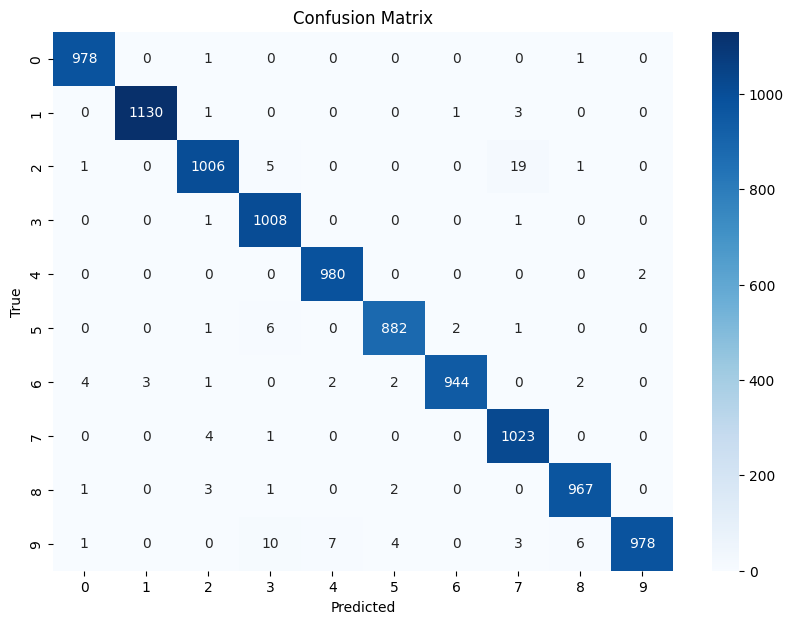

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.97      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1-score
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred)
print(report)
